In [3]:
#DEMO
#pd.reset_option("display.max_rows")
import os
import pandas as pd
import numpy as np
import sklearn as SKLearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#pip install import_ipynb
import import_ipynb

importing Jupyter notebook from Licencjat_Modelling_Goalkeepers.ipynb
0.37745486769861747 0.05474278866559145 9


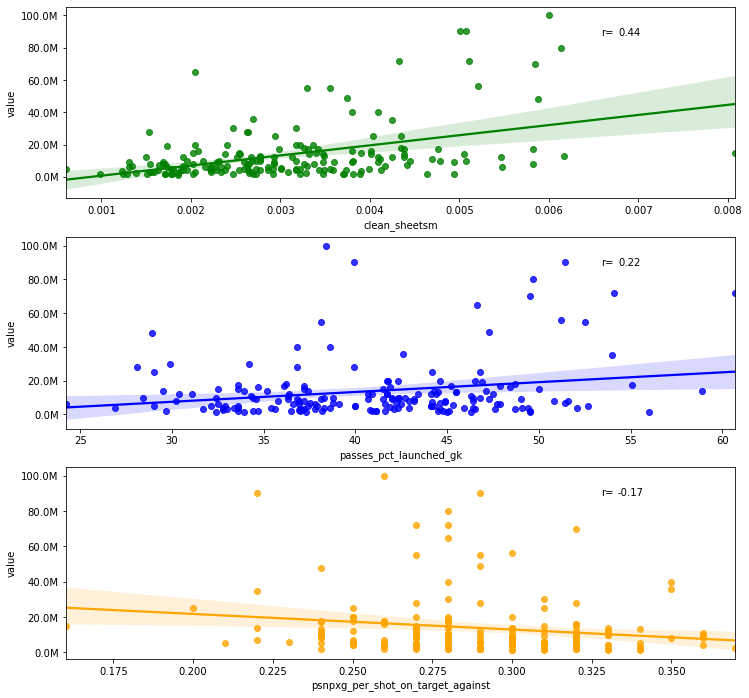

In [4]:
os.chdir(' ') #set proper directory
import Licencjat_Modelling_Goal keepers as GK

In [5]:
data=GK.dataGK
data

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,foot_both,foot_left,foot_right,predsOLS
18,1871.0,Fernando Pacheco,es ESP,GK,AlavÄ‚Â©s,27.0,1992.0,14000000.0,186.0,Goalkeeper,...,0,0,0,0,0,1,0,1,0,5.308040e+06
87,1401.0,Bernd Leno,de GER,GK,Arsenal,27.0,1992.0,28000000.0,190.0,Goalkeeper,...,0,1,0,0,0,1,0,0,1,1.227534e+07
92,1568.0,Emiliano MartÄ‚Â­nez,ar ARG,GK,Arsenal,26.0,1992.0,2000000.0,195.0,Goalkeeper,...,0,1,0,0,0,1,0,0,1,6.613662e+06
116,1067.0,Tom Heaton,eng ENG,GK,Aston Villa,33.0,1986.0,4000000.0,188.0,Goalkeeper,...,0,1,0,0,0,1,0,0,1,2.798741e+06
127,1812.0,Ä‚Â�rjan Nyland,no NOR,GK,Aston Villa,28.0,1990.0,1200000.0,192.0,Goalkeeper,...,0,1,0,0,0,1,0,0,1,2.780931e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4653,NaN,Ben Foster,eng ENG,GK,Watford,35.0,1983.0,3000000.0,193.0,Goalkeeper,...,0,1,0,0,1,0,0,1,0,5.033020e+06
4712,NaN,Koen Casteels,be BEL,GK,Wolfsburg,26.0,1992.0,13000000.0,197.0,Goalkeeper,...,0,0,0,0,1,0,0,1,0,7.020356e+06
4739,NaN,Rui PatrĂ­cio,pt POR,GK,Wolves,30.0,1988.0,20000000.0,190.0,Goalkeeper,...,0,1,0,0,1,0,0,1,0,1.315161e+07
5553,NaN,Jordan Pickford,eng ENG,GK,Everton,23.0,1994.0,30000000.0,185.0,Goalkeeper,...,0,1,0,1,0,0,0,1,0,2.299064e+07


In [6]:
data['Over/undervalued']=np.where(data['value']-data['predsOLS']>0, 'Overvalued', 'Undervalued')
data

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,foot_both,foot_left,foot_right,predsOLS,Over/undervalued
18,1871.0,Fernando Pacheco,es ESP,GK,AlavÄ‚Â©s,27.0,1992.0,14000000.0,186.0,Goalkeeper,...,0,0,0,0,1,0,1,0,5.308040e+06,Overvalued
87,1401.0,Bernd Leno,de GER,GK,Arsenal,27.0,1992.0,28000000.0,190.0,Goalkeeper,...,1,0,0,0,1,0,0,1,1.227534e+07,Overvalued
92,1568.0,Emiliano MartÄ‚Â­nez,ar ARG,GK,Arsenal,26.0,1992.0,2000000.0,195.0,Goalkeeper,...,1,0,0,0,1,0,0,1,6.613662e+06,Undervalued
116,1067.0,Tom Heaton,eng ENG,GK,Aston Villa,33.0,1986.0,4000000.0,188.0,Goalkeeper,...,1,0,0,0,1,0,0,1,2.798741e+06,Overvalued
127,1812.0,Ä‚Â�rjan Nyland,no NOR,GK,Aston Villa,28.0,1990.0,1200000.0,192.0,Goalkeeper,...,1,0,0,0,1,0,0,1,2.780931e+06,Undervalued
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4653,NaN,Ben Foster,eng ENG,GK,Watford,35.0,1983.0,3000000.0,193.0,Goalkeeper,...,1,0,0,1,0,0,1,0,5.033020e+06,Undervalued
4712,NaN,Koen Casteels,be BEL,GK,Wolfsburg,26.0,1992.0,13000000.0,197.0,Goalkeeper,...,0,0,0,1,0,0,1,0,7.020356e+06,Overvalued
4739,NaN,Rui PatrĂ­cio,pt POR,GK,Wolves,30.0,1988.0,20000000.0,190.0,Goalkeeper,...,1,0,0,1,0,0,1,0,1.315161e+07,Overvalued
5553,NaN,Jordan Pickford,eng ENG,GK,Everton,23.0,1994.0,30000000.0,185.0,Goalkeeper,...,1,0,1,0,0,0,1,0,2.299064e+07,Overvalued


In [7]:
#splitting data
yGK = data['Over/undervalued']
XGK = data[['age','psxg_gk','games_starts','passes_pct_launched_gk','pct_goal_kicks_launched','isPremierLeague','isLaLiga','isLigue1','clean_sheets','saves']]
XGK_train, XGK_test, yGK_train, yGK_test = train_test_split(XGK,yGK,test_size=0.2)

In [9]:
#applying algorithm
net=MLPClassifier(hidden_layer_sizes=(100,),activation='logistic')
netsolver='lbfgs'
net.max_iter=1000
net.fit(XGK_test,yGK_test)
ytest_predict=net.predict(XGK)
trueorfalse=np.where(np.array(yGK)==ytest_predict,'T','F')
outcome=len(trueorfalse[trueorfalse=='T'])/len(trueorfalse)*100
outcome=format(outcome, '.2f')
outcome=str(outcome)
print('There are ' + outcome + '%' + ' correct classificiations')

There are 56.76% correct classificiations
